In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
%load_ext rpy2.ipython
import pandas.rpy.common as com
import rpy2.interactive.packages 
from scipy.io import loadmat
from __future__ import division
import os
from scipy import stats as st
from scipy.stats import norm
import statsmodels.formula.api as sm
import datetime
import re
import shutil
import string
from __future__ import division, print_function

now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d_%H:%M")
month = now.strftime("%B")

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import sys
import seaborn as sns
%matplotlib inline
%R library(reshape2)
%R library(Hmisc)
%R library(ggplot2)

RuntimeError: R_USER not defined.

In [2]:
path_list = glob.glob('*test*.csv')

In [3]:
path_list

['100_test_2016_Jul_11_1540.csv',
 '101_test_2016_Jul_11_1528.csv',
 '102_test_2016_Jul_11_1558.csv',
 '110_test_2016_Aug_16_1429.csv',
 '111_test_2016_Jul_08_1050.csv',
 '112_test_2016_Jul_15_1138.csv',
 '113_test_2016_Jul_15_1448.csv',
 '114_test_2016_Jul_15_1542.csv',
 '115_test_2016_Jul_21_1239.csv',
 '116_test_2016_Jul_21_1530.csv',
 '117_test_2016_Jul_27_1439.csv',
 '118_test_2016_Aug_04_1343.csv']

In [4]:
len(path_list)

12

In [5]:
path_list[0]

'100_test_2016_Jul_11_1540.csv'

In [6]:
temp_df = pd.read_csv(path_list[0])
temp_df.head()

,comparison,stim1_dots2,stim2_color1,stim1_dots3,stim2_color3,stim1_dots1,stim2_dots1,stim2_color2,stim1_color1,stim1_color2,...,correct,.thisRepN,.thisTrialN,.thisN,.thisIndex,response,response_time,stim_response,date,Unnamed: 24
0,4,8,orange,3,blue,5,9,brown,orange,brown,...,Right,0,0,0,0,0,2.807315,Right,2016_Jul_11_1540,NaN
1,10,9,purple,7,darkgrey,6,6,red,yellow,pink,...,Left,0,1,1,1,1,0.037654,Left,2016_Jul_11_1540,NaN
2,5,2,pink,4,yellow,1,5,green,pink,green,...,Right,0,2,2,2,0,0.989293,Right,2016_Jul_11_1540,NaN
3,1,8,pink,6,blue,1,9,green,pink,green,...,Left,0,3,3,3,1,2.925169,Left,2016_Jul_11_1540,NaN
4,5,2,orange,4,yellow,1,5,darkgrey,orange,darkgrey,...,Right,0,4,4,4,0,0.782726,Right,2016_Jul_11_1540,NaN


In [7]:
temp_path = path_list[0]

In [8]:
combined_df = pd.DataFrame()

In [9]:
i = 0
df_list = [] 
for path in path_list:
    temp_df = pd.read_csv(path, header=0, index_col=None)
    df_list.append(temp_df)

In [10]:
combined_df = pd.concat(df_list)

In [11]:
combined_df.to_csv("combined_data.csv", index=False)

In [12]:
len(combined_df)

389

In [13]:
combined_df['accuracy'] = 1

In [14]:
combined_df.head()

,comparison,stim1_dots2,stim2_color1,stim1_dots3,stim2_color3,stim1_dots1,stim2_dots1,stim2_color2,stim1_color1,stim1_color2,...,.thisRepN,.thisTrialN,.thisN,.thisIndex,response,response_time,stim_response,date,Unnamed: 24,accuracy
0,4,8,orange,3,blue,5,9,brown,orange,brown,...,0,0,0,0,0,2.807315,Right,2016_Jul_11_1540,NaN,1
1,10,9,purple,7,darkgrey,6,6,red,yellow,pink,...,0,1,1,1,1,0.037654,Left,2016_Jul_11_1540,NaN,1
2,5,2,pink,4,yellow,1,5,green,pink,green,...,0,2,2,2,0,0.989293,Right,2016_Jul_11_1540,NaN,1
3,1,8,pink,6,blue,1,9,green,pink,green,...,0,3,3,3,1,2.925169,Left,2016_Jul_11_1540,NaN,1
4,5,2,orange,4,yellow,1,5,darkgrey,orange,darkgrey,...,0,4,4,4,0,0.782726,Right,2016_Jul_11_1540,NaN,1


In [15]:
combined_df['accuracy'] = combined_df['stim_response'] == combined_df['correct']
combined_df['accuracy'] = combined_df['accuracy'].astype(int) 
combined_df.head(50)

,comparison,stim1_dots2,stim2_color1,stim1_dots3,stim2_color3,stim1_dots1,stim2_dots1,stim2_color2,stim1_color1,stim1_color2,...,.thisRepN,.thisTrialN,.thisN,.thisIndex,response,response_time,stim_response,date,Unnamed: 24,accuracy
0,4,8,orange,3,blue,5,9,brown,orange,brown,...,0,0,0,0,0,2.807315,Right,2016_Jul_11_1540,NaN,1
1,10,9,purple,7,darkgrey,6,6,red,yellow,pink,...,0,1,1,1,1,0.037654,Left,2016_Jul_11_1540,NaN,1
2,5,2,pink,4,yellow,1,5,green,pink,green,...,0,2,2,2,0,0.989293,Right,2016_Jul_11_1540,NaN,1
3,1,8,pink,6,blue,1,9,green,pink,green,...,0,3,3,3,1,2.925169,Left,2016_Jul_11_1540,NaN,1
4,5,2,orange,4,yellow,1,5,darkgrey,orange,darkgrey,...,0,4,4,4,0,0.782726,Right,2016_Jul_11_1540,NaN,1
5,3,7,red,3,blue,1,9,green,red,green,...,0,5,5,5,1,1.433441,Left,2016_Jul_11_1540,NaN,0
6,11,1,purple,7,darkgrey,4,4,orange,blue,pink,...,0,6,6,6,0,0.276636,Right,2016_Jul_11_1540,NaN,1
7,6,7,red,3,yellow,5,9,brown,red,brown,...,0,7,7,7,1,0.354152,Left,2016_Jul_11_1540,NaN,1
8,3,7,pink,3,blue,1,9,darkgrey,pink,darkgrey,...,0,8,8,8,0,1.873289,Right,2016_Jul_11_1540,NaN,1
9,4,2,pink,4,blue,9,5,brown,pink,brown,...,0,9,9,9,0,0.184031,Right,2016_Jul_11_1540,NaN,0


In [16]:
combined_df['accuracy'].mean()

0.5424164524421594

temp_df.head(50)

In [17]:
accmean = combined_df['accuracy'].mean()

In [46]:
test_df = combined_df.groupby(['test']).mean()

In [19]:
df2 = combined_df.groupby(['test', 'participant']).mean().reset_index(level=[0, 1])

In [20]:
df3 = combined_df.groupby(['participant']).mean().reset_index(level=[0])

In [21]:
combined_df.head()

,comparison,stim1_dots2,stim2_color1,stim1_dots3,stim2_color3,stim1_dots1,stim2_dots1,stim2_color2,stim1_color1,stim1_color2,stim1_color3,participant,test,stim2_dots3,stim2_dots2,correct,.thisRepN,.thisTrialN,.thisN,.thisIndex,response,response_time,stim_response,date,Unnamed: 24,accuracy
0,4,8,orange,3,blue,5,9,brown,orange,brown,blue,100,dots,4,2,Right,0,0,0,0,0,2.807315,Right,2016_Jul_11_1540,NaN,1
1,10,9,purple,7,darkgrey,6,6,red,yellow,pink,brown,100,colours,7,9,Left,0,1,1,1,1,0.037654,Left,2016_Jul_11_1540,NaN,1
2,5,2,pink,4,yellow,1,5,green,pink,green,yellow,100,dots,3,7,Right,0,2,2,2,0,0.989293,Right,2016_Jul_11_1540,NaN,1
3,1,8,pink,6,blue,1,9,green,pink,green,blue,100,dots,4,7,Left,0,3,3,3,1,2.925169,Left,2016_Jul_11_1540,NaN,1
4,5,2,orange,4,yellow,1,5,darkgrey,orange,darkgrey,yellow,100,dots,3,7,Right,0,4,4,4,0,0.782726,Right,2016_Jul_11_1540,NaN,1


In [22]:
%R -i combined_df
%R accuracyreshaped <- melt(combined_df, id.vars=('participant'), meansure.vars=c('accuracy', 'test'))

,participant,variable,value
1,100,comparison,4
2,100,comparison,10
3,100,comparison,5
4,100,comparison,1
5,100,comparison,5
6,100,comparison,3
7,100,comparison,11
8,100,comparison,6
9,100,comparison,3
10,100,comparison,4


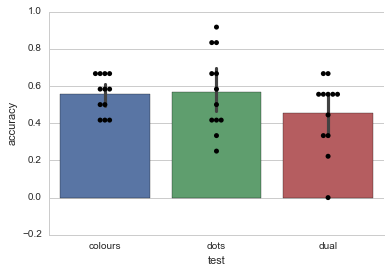

In [23]:
#Graphing the accuracy of individual accuracy scores on test items
sns.set_style("whitegrid")
ax = sns.barplot(x="test", y="accuracy", data=df2)
ax = sns.swarmplot(x="test", y="accuracy", data=df2, palette=sns.color_palette(["Black"])) 
sns.despine()

In [24]:
combined_df.head()

,comparison,stim1_dots2,stim2_color1,stim1_dots3,stim2_color3,stim1_dots1,stim2_dots1,stim2_color2,stim1_color1,stim1_color2,stim1_color3,participant,test,stim2_dots3,stim2_dots2,correct,.thisRepN,.thisTrialN,.thisN,.thisIndex,response,response_time,stim_response,date,Unnamed: 24,accuracy
0,4,8,orange,3,blue,5,9,brown,orange,brown,blue,100,dots,4,2,Right,0,0,0,0,0,2.807315,Right,2016_Jul_11_1540,NaN,1
1,10,9,purple,7,darkgrey,6,6,red,yellow,pink,brown,100,colours,7,9,Left,0,1,1,1,1,0.037654,Left,2016_Jul_11_1540,NaN,1
2,5,2,pink,4,yellow,1,5,green,pink,green,yellow,100,dots,3,7,Right,0,2,2,2,0,0.989293,Right,2016_Jul_11_1540,NaN,1
3,1,8,pink,6,blue,1,9,green,pink,green,blue,100,dots,4,7,Left,0,3,3,3,1,2.925169,Left,2016_Jul_11_1540,NaN,1
4,5,2,orange,4,yellow,1,5,darkgrey,orange,darkgrey,yellow,100,dots,3,7,Right,0,4,4,4,0,0.782726,Right,2016_Jul_11_1540,NaN,1


In [25]:
%%R
t.test(combined_df$accuracy, mu=.5)


	One Sample t-test

data:  combined_df$accuracy
t = 1.6771, df = 388, p-value = 0.09434
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4926896 0.5921433
sample estimates:
mean of x 
0.5424165 



In [26]:
%%R
mean(combined_df$accuracy)

[1] 0.5424165


In [27]:
%%R
colours = subset(combined_df, test=="colours")

In [28]:
%%R
t.test(colours$accuracy, mu=0.5)


	One Sample t-test

data:  colours$accuracy
t = 1.337, df = 143, p-value = 0.1834
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4734177 0.6376934
sample estimates:
mean of x 
0.5555556 



In [29]:
%%R
dots = subset(combined_df, test=="dots")

In [30]:
%%R
t.test(dots$accuracy, mu=.5)


	One Sample t-test

data:  dots$accuracy
t = 1.6771, df = 143, p-value = 0.0957
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4875958 0.6512931
sample estimates:
mean of x 
0.5694444 



In [31]:
%%R
dual = subset(combined_df, test=="dual")

In [32]:
%%R
t.test(dual$accuracy, mu=0.5)


	One Sample t-test

data:  dual$accuracy
t = -0.29716, df = 100, p-value = 0.767
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.3859937 0.5843033
sample estimates:
mean of x 
0.4851485 



In [33]:
%%R
sd(combined_df$accuracy)

[1] 0.4988392


In [34]:
%%R
sd(colours$accuracy)

[1] 0.4986384


In [35]:
%%R
sd(dots$accuracy)

[1] 0.4968823


In [36]:
%%R
sd(dual$accuracy)

[1] 0.5022721


In [37]:
%%R 
diff.aov <- aov(combined_df$accuracy ~ combined_df$test)
summary(diff.aov)

                  Df Sum Sq Mean Sq F value Pr(>F)
combined_df$test   2   0.46  0.2306   0.927  0.397
Residuals        386  96.09  0.2489               


In [38]:
%%R
TukeyHSD(diff.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = combined_df$accuracy ~ combined_df$test)

$`combined_df$test`
                    diff        lwr        upr     p adj
dots-colours  0.01388889 -0.1244549 0.15223268 0.9697138
dual-colours -0.07040704 -0.2227657 0.08195158 0.5225463
dual-dots    -0.08429593 -0.2366545 0.06806269 0.3950584



In [45]:
df3.head(15)

,participant,comparison,stim1_dots2,stim1_dots3,stim1_dots1,stim2_dots1,stim2_dots3,stim2_dots2,.thisRepN,.thisTrialN,.thisN,.thisIndex,response,response_time,Unnamed: 24,accuracy
0,100,8.757576,5.121212,4.575758,4.636364,5.424242,4.878788,5.121212,0.0,16.0,16.0,16.0,0.484848,0.957016,NaN,0.575758
1,101,8.757576,4.939394,4.363636,5.272727,4.060606,5.030303,5.060606,0.0,16.0,16.0,16.0,0.393939,0.253478,NaN,0.575758
2,102,8.757576,5.484848,4.666667,4.969697,4.848485,5.151515,5.969697,0.0,16.0,16.0,16.0,0.393939,0.581776,NaN,0.424242
3,110,8.757576,5.424242,4.545455,4.606061,4.787879,4.727273,5.303030,0.0,16.0,16.0,16.0,0.515152,0.400029,NaN,0.424242
4,111,8.757576,4.909091,4.818182,5.060606,4.515152,4.878788,5.090909,0.0,16.0,16.0,16.0,0.393939,0.274893,NaN,0.484848
5,112,8.757576,5.181818,4.363636,5.636364,4.606061,5.090909,5.303030,0.0,16.0,16.0,16.0,0.545455,1.065886,NaN,0.727273
6,113,7.000000,4.615385,5.153846,5.692308,4.461538,5.153846,5.076923,0.0,12.5,12.5,12.5,0.653846,0.981265,NaN,0.615385
7,114,8.757576,4.939394,4.363636,5.242424,4.636364,4.848485,5.303030,0.0,16.0,16.0,16.0,0.363636,0.336193,NaN,0.696970
8,115,8.757576,4.909091,4.454545,5.060606,4.696970,4.757576,5.575758,0.0,16.0,16.0,16.0,0.363636,0.444781,NaN,0.606061
9,116,8.757576,5.303030,4.272727,4.484848,5.151515,4.151515,5.424242,0.0,16.0,16.0,16.0,0.333333,0.323068,NaN,0.484848


In [47]:
test_df.head()

,comparison,stim1_dots2,stim1_dots3,stim1_dots1,stim2_dots1,participant,stim2_dots3,stim2_dots2,.thisRepN,.thisTrialN,.thisN,.thisIndex,response,response_time,Unnamed: 24,accuracy
test,,,,,,,,,,,,,,,,
colours,9.500000,4.777778,5.763889,4.520833,4.520833,110.750000,5.763889,4.777778,0.0,11.250000,11.250000,11.250000,0.479167,0.533660,NaN,0.555556
dots,3.500000,5.395833,3.826389,5.166667,4.833333,110.750000,4.006944,5.937500,0.0,11.750000,11.750000,11.750000,0.437500,0.551524,NaN,0.569444
dual,14.742574,5.059406,4.277228,5.663366,4.970297,110.594059,5.009901,5.019802,0.0,27.930693,27.930693,27.930693,0.336634,0.573486,NaN,0.485149


In [49]:
df2.head(50)

,test,participant,comparison,stim1_dots2,stim1_dots3,stim1_dots1,stim2_dots1,stim2_dots3,stim2_dots2,.thisRepN,.thisTrialN,.thisN,.thisIndex,response,response_time,Unnamed: 24,accuracy
0,colours,100,9.500000,4.666667,5.583333,4.833333,4.833333,5.583333,4.666667,0.0,14.250000,14.250000,14.250000,0.416667,0.583119,NaN,0.500000
1,colours,101,9.500000,4.333333,5.500000,3.833333,3.833333,5.500000,4.333333,0.0,11.250000,11.250000,11.250000,0.500000,0.264570,NaN,0.583333
2,colours,102,9.500000,6.333333,6.083333,4.500000,4.500000,6.083333,6.333333,0.0,7.666667,7.666667,7.666667,0.583333,0.591926,NaN,0.500000
3,colours,110,9.500000,5.333333,5.333333,3.916667,3.916667,5.333333,5.333333,0.0,11.166667,11.166667,11.166667,0.333333,0.418183,NaN,0.416667
4,colours,111,9.500000,4.333333,5.916667,4.166667,4.166667,5.916667,4.333333,0.0,11.000000,11.000000,11.000000,0.500000,0.235141,NaN,0.583333
5,colours,112,9.500000,5.000000,5.583333,5.083333,5.083333,5.583333,5.000000,0.0,8.750000,8.750000,8.750000,0.500000,1.142287,NaN,0.666667
6,colours,113,9.500000,3.666667,6.666667,5.250000,5.250000,6.666667,3.666667,0.0,12.416667,12.416667,12.416667,0.583333,0.937235,NaN,0.666667
7,colours,114,9.500000,4.666667,5.250000,4.583333,4.583333,5.250000,4.666667,0.0,11.500000,11.500000,11.500000,0.416667,0.474438,NaN,0.666667
8,colours,115,9.500000,5.000000,5.250000,4.416667,4.416667,5.250000,5.000000,0.0,9.666667,9.666667,9.666667,0.666667,0.289053,NaN,0.666667
9,colours,116,9.500000,5.333333,4.166667,4.250000,4.250000,4.166667,5.333333,0.0,12.500000,12.500000,12.500000,0.416667,0.257335,NaN,0.416667
